In [1]:
import numpy as np
import matplotlib.pyplot as plt

import emcee
import corner

import _pickle as cPickle
import matplotlib as mpl

In [2]:
cat = np.genfromtxt('../forElena16Nov/SAGITTARIUS-II_cat16Nov.dat',names=True)

In [3]:
xgood = cat['x_f606w']
ygood = cat['y_f606w']
m606 = cat['magr_f606w']
dm606 = cat['err_f606w']
m814 = cat['magr_f814w']
dm814 = cat['err_f814w']

In [4]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [5]:
def returnPDF(rich,x0,y0,gal_ext_pix,gal_ell,gal_pa):
    
    costh = np.cos(-1 * np.deg2rad(gal_pa))
    sinth = np.sin(-1 * np.deg2rad(gal_pa))

    dx = xbin - x0
    dy = ybin - y0

    r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
    r2 = (dx * sinth + dy * costh)

    radius = np.sqrt(r1**2 + r2**2)
    
    r_h = gal_ext_pix
    norm = r_h**2 / (np.pi * (1-gal_ell))
    # half light radius squared / (pi * 1-ell)
    pdf = norm/((radius**2 + r_h**2)**2)
    
    arr = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    r_annuli = (arr + 0.05) * r_h

    # .05r_h, .15r_h
    area_annuli = np.pi * ( (r_annuli + (0.05*r_h))**2 - (r_annuli - (0.05*r_h))**2) * (1-gal_ell)
    
#     pix_per_arcsec=20
#     area_arcmin = area_annuli/(pix_per_arcsec*60)**2
    
    aa = area_annuli # trying. to do everything in pixel space right now

    return pdf, radius, aa


In [6]:
samples_h = cPickle.load( open( "sag2mcmcPL1902-2.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich_h,[rich_min,rich_max] = median_interval(samples_h[:,0])
x_h,[xmin,xmax] = median_interval(samples_h[:,1])
y_h,[ymin,ymax] = median_interval(samples_h[:,2])
sag2_ext_fit_h,[sag2_ext_min,sag2_ext_max] = median_interval(samples_h[:,3])
sag2_ell_fit_h,[sag2_ell_min,sag2_ell_max] = median_interval(samples_h[:,4])
sag2_pa_fit_h,[sag2_pa_min,sag2_pa_max] = median_interval(samples_h[:,5])

res = [rich_h,rich_max-rich_h,rich_h-rich_min,x_h,xmax-x_h,x_h-xmin,y_h,ymax-y_h,y_h-ymin,
           sag2_ext_fit_h,sag2_ext_max-sag2_ext_fit_h,sag2_ext_fit_h-sag2_ext_min,
           sag2_ell_fit_h,sag2_ell_max-sag2_ell_fit_h,sag2_ell_fit_h-sag2_ell_min,
           sag2_pa_fit_h,sag2_pa_max-sag2_pa_fit_h,sag2_pa_fit_h-sag2_pa_min]

print(res)

[7797.203862521483, 175.1170013876881, 169.9691550171883, 2329.9465406833224, 23.077491706560068, 23.190543779932796, 2181.2670905972664, 27.52270906633248, 27.484441464997417, 2216.950480728354, 62.63551251306626, 60.09283508331464, 0.14159011019323087, 0.02659166698660012, 0.027261593328883893, -16.455886266280395, 5.2845732523603814, 5.6478025933461815]


In [7]:
samples_m = cPickle.load( open( "sag2mcmcPL2202-mask.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich_m,[rich_min,rich_max] = median_interval(samples_m[:,0])
x_m,[xmin,xmax] = median_interval(samples_m[:,1])
y_m,[ymin,ymax] = median_interval(samples_m[:,2])
sag2_ext_fit_m,[sag2_ext_min,sag2_ext_max] = median_interval(samples_m[:,3])
sag2_ell_fit_m,[sag2_ell_min,sag2_ell_max] = median_interval(samples_m[:,4])
sag2_pa_fit_m,[sag2_pa_min,sag2_pa_max] = median_interval(samples_m[:,5])

res = [rich_m,rich_max-rich_m,rich_m-rich_min,x_m,xmax-x_m,x_m-xmin,y_m,ymax-y_m,y_m-ymin,
           sag2_ext_fit_m,sag2_ext_max-sag2_ext_fit_m,sag2_ext_fit_m-sag2_ext_min,
           sag2_ell_fit_m,sag2_ell_max-sag2_ell_fit_m,sag2_ell_fit_m-sag2_ell_min,
           sag2_pa_fit_m,sag2_pa_max-sag2_pa_fit_m,sag2_pa_fit_m-sag2_pa_min]

print(res)

[11058.514800217721, 410.80570512263694, 384.54375710644854, 2449.699861527494, 34.908823537881744, 33.60034012419965, 2313.4310797801118, 38.567992124142165, 37.616934485424736, 2747.509317185759, 115.06638174281034, 103.9546230160372, 0.09916711817333089, 0.0441457761467164, 0.0474369229317573, -4.664992553440199, 10.716709517610987, 11.33436094542974]


In [8]:
# richness = 6071 +720/-960  [seems large, given the total number of stars in the catalog]
# x_center = 2527 + 47/-45
# y_center = 2235 +53/-51
# rhalf = 2677 +195/-202 -> 2.23’
# ellip = 0.14 +0.05/-0.06   [maybe marginally consistent with published limits]
# PA = -8 +11/-12

In [9]:
xbin0 = np.ones((179,1))  # (fltarr(267)+1)
xbin1 = np.ones((1,179))  
xbin1[0] = np.arange(0,179,1)
xbin2 = xbin1 * 30 + 15  # (findgen(267)*30. + 15)
xbin = np.matmul(xbin0,xbin2)
ybin = xbin.T

xdel = 30.
ydel = 30.
pixarea = xdel*ydel  # pixel area in each bin

In [10]:
pdf_h, rad_h, aa_h = returnPDF(rich_h,x_h,y_h,sag2_ext_fit_h,
                                        sag2_ell_fit_h,sag2_pa_fit_h)

In [11]:
pdf_m, rad_m, aa_m = returnPDF(rich_m,x_m,y_m,sag2_ext_fit_m,
                                        sag2_ell_fit_m,sag2_pa_fit_m)

In [12]:
model_counts_h = rich_h*pdf_h*pixarea  # a 179x179 array
model_counts_m = rich_m*pdf_m*pixarea  # a 179x179 array

In [13]:
# Observed surface density map
binned_surface_density_30 = np.zeros((179,179))
for ii in range(179):
    for jj in range(179):
        idx = np.logical_and(np.logical_and(xgood >= (30 * ii),xgood <= (30 * (ii + 1))),
                     np.logical_and(ygood >= (30 * jj),ygood <= (30 * (jj + 1))))

        tmp = np.where(idx)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [14]:
# Define annuli
radiusH=rad_h.flatten()
r_h_h = sag2_ext_fit_h
r1_h = np.where(radiusH < (0.1 * r_h_h))[0]
r2_h = np.where((radiusH < (0.2 * r_h_h)) & (radiusH >= (0.1 * r_h_h)))[0]
r3_h = np.where((radiusH < (0.3 * r_h_h)) & (radiusH >= (0.2 * r_h_h)))[0]
r4_h = np.where((radiusH < (0.4 * r_h_h)) & (radiusH >= (0.3 * r_h_h)))[0]
r5_h = np.where((radiusH < (0.5 * r_h_h)) & (radiusH >= (0.4 * r_h_h)))[0]
r6_h = np.where((radiusH < (0.6 * r_h_h)) & (radiusH >= (0.5 * r_h_h)))[0]
r7_h = np.where((radiusH < (0.7 * r_h_h)) & (radiusH >= (0.6 * r_h_h)))[0]
r8_h = np.where((radiusH < (0.8 * r_h_h)) & (radiusH >= (0.7 * r_h_h)))[0]
r9_h = np.where((radiusH < (0.9 * r_h_h)) & (radiusH >= (0.8 * r_h_h)))[0]
r10_h = np.where((radiusH < r_h_h) & (radiusH >= (0.9 * r_h_h)))[0]

In [15]:
r0_c = np.where(radiusH < (0.1 * r_h_h))[0]
aa_c = np.pi * (r0_c )**2 * (1-sag2_ell_fit_h)

In [16]:
# Define annuli
radiusM=rad_m.flatten()
r_h_m = sag2_ext_fit_m
r1_m = np.where(radiusM < (0.1 * r_h_m))[0]
r2_m = np.where((radiusM < (0.2 * r_h_m)) & (radiusM >= (0.1 * r_h_m)))[0]
r3_m = np.where((radiusM < (0.3 * r_h_m)) & (radiusM >= (0.2 * r_h_m)))[0]
r4_m = np.where((radiusM < (0.4 * r_h_m)) & (radiusM >= (0.3 * r_h_m)))[0]
r5_m = np.where((radiusM < (0.5 * r_h_m)) & (radiusM >= (0.4 * r_h_m)))[0]
r6_m = np.where((radiusM < (0.6 * r_h_m)) & (radiusM >= (0.5 * r_h_m)))[0]
r7_m = np.where((radiusM < (0.7 * r_h_m)) & (radiusM >= (0.6 * r_h_m)))[0]
r8_m = np.where((radiusM < (0.8 * r_h_m)) & (radiusM >= (0.7 * r_h_m)))[0]
r9_m = np.where((radiusM < (0.9 * r_h_m)) & (radiusM >= (0.8 * r_h_m)))[0]
r10_m = np.where((radiusM < r_h_m) & (radiusM >= (0.9 * r_h_m)))[0]

In [17]:
binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_sag2_h_f = model_counts_h.flatten()
model_counts_sag2_m_f = model_counts_m.flatten()

In [18]:
rho0 = binned_surface_density_30f[r0_c].sum()/aa_c[0]

In [19]:
data_1d_h = [binned_surface_density_30f[r1_h].sum()/aa_h[0],
           binned_surface_density_30f[r2_h].sum()/aa_h[1],
           binned_surface_density_30f[r3_h].sum()/aa_h[2],
           binned_surface_density_30f[r4_h].sum()/aa_h[3],
           binned_surface_density_30f[r5_h].sum()/aa_h[4],
           binned_surface_density_30f[r6_h].sum()/aa_h[5],
           binned_surface_density_30f[r7_h].sum()/aa_h[6],
           binned_surface_density_30f[r8_h].sum()/aa_h[7],
           binned_surface_density_30f[r9_h].sum()/aa_h[8],
           binned_surface_density_30f[r10_h].sum()/aa_h[9]]

data_1d_m = [binned_surface_density_30f[r1_m].sum()/aa_m[0],
           binned_surface_density_30f[r2_m].sum()/aa_m[1],
           binned_surface_density_30f[r3_m].sum()/aa_m[2],
           binned_surface_density_30f[r4_m].sum()/aa_m[3],
           binned_surface_density_30f[r5_m].sum()/aa_m[4],
           binned_surface_density_30f[r6_m].sum()/aa_m[5],
           binned_surface_density_30f[r7_m].sum()/aa_m[6],
           binned_surface_density_30f[r8_m].sum()/aa_m[7],
           binned_surface_density_30f[r9_m].sum()/aa_m[8],
           binned_surface_density_30f[r10_m].sum()/aa_m[9]]

model_1d_h = [model_counts_sag2_h_f[r1_h].sum()/aa_h[0],
            model_counts_sag2_h_f[r2_h].sum()/aa_h[1],
            model_counts_sag2_h_f[r3_h].sum()/aa_h[2],
            model_counts_sag2_h_f[r4_h].sum()/aa_h[3],
            model_counts_sag2_h_f[r5_h].sum()/aa_h[4],
            model_counts_sag2_h_f[r6_h].sum()/aa_h[5],
            model_counts_sag2_h_f[r7_h].sum()/aa_h[6],
            model_counts_sag2_h_f[r8_h].sum()/aa_h[7],
            model_counts_sag2_h_f[r9_h].sum()/aa_h[8],
            model_counts_sag2_h_f[r10_h].sum()/aa_h[9]]

model_1d_m = [model_counts_sag2_m_f[r1_m].sum()/aa_m[0],
            model_counts_sag2_m_f[r2_m].sum()/aa_m[1],
            model_counts_sag2_m_f[r3_m].sum()/aa_m[2],
            model_counts_sag2_m_f[r4_m].sum()/aa_m[3],
            model_counts_sag2_m_f[r5_m].sum()/aa_m[4],
            model_counts_sag2_m_f[r6_m].sum()/aa_m[5],
            model_counts_sag2_m_f[r7_m].sum()/aa_m[6],
            model_counts_sag2_m_f[r8_m].sum()/aa_m[7],
            model_counts_sag2_m_f[r9_m].sum()/aa_m[8],
            model_counts_sag2_m_f[r10_m].sum()/aa_m[9]]

In [20]:
dist_h = np.array([r_h_h*0.1,r_h_h*0.2,r_h_h*0.3,r_h_h*0.4,r_h_h*0.5,r_h_h*0.6,r_h_h*0.7,r_h_h*0.8,r_h_h*0.9,r_h_h])
dist_m = np.array([r_h_m*0.1,r_h_m*0.2,r_h_m*0.3,r_h_m*0.4,r_h_m*0.5,r_h_m*0.6,r_h_m*0.7,r_h_m*0.8,r_h_m*0.9,r_h_m])

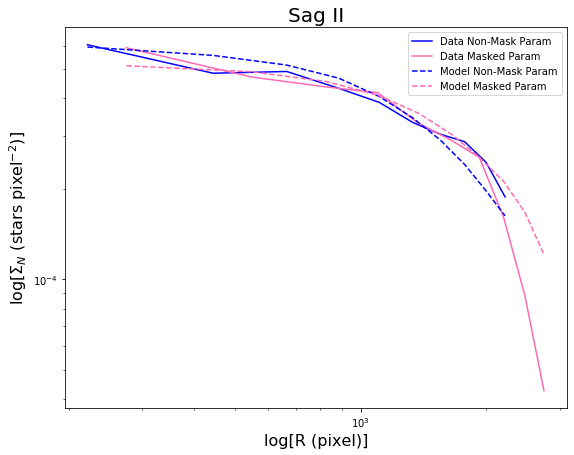

In [21]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_h,data_1d_h,label='Data Non-Mask Param',color='blue')
ax.plot(dist_m,data_1d_m,label='Data Masked Param',color='hotpink')

ax.plot(dist_h,model_1d_h,label='Model Non-Mask Param',color='blue',linestyle='--')
ax.plot(dist_m,model_1d_m,label='Model Masked Param',color='hotpink',linestyle='--')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars pixel$^{-2}$)]',fontsize=16)
ax.set_xlabel(r'log[R (pixel)]',fontsize=16)
ax.set_title('Sag II',fontsize=20)

# ax.set_xticks([1, 2])
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

# ax.set_yticks([1e+2, 1e+3])
# ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())


ax.legend()
plt.savefig('figures/sgr2_2202mask.png')
plt.show()

In [22]:
from scipy.optimize import curve_fit

In [23]:
rho0 = data_1d_h[0]

In [24]:
def func(radius,a):
    
    val = rho0/(1 + (radius/a)**2)**(5/2)
    
    return val

In [25]:
popt, _ = curve_fit(func,xdata=dist_h,ydata=data_1d_h,p0=r_h_h)


In [26]:
# popt2, _ = curve_fit(func,xdata=dist_h,ydata=data_1d_h,p0=popt)

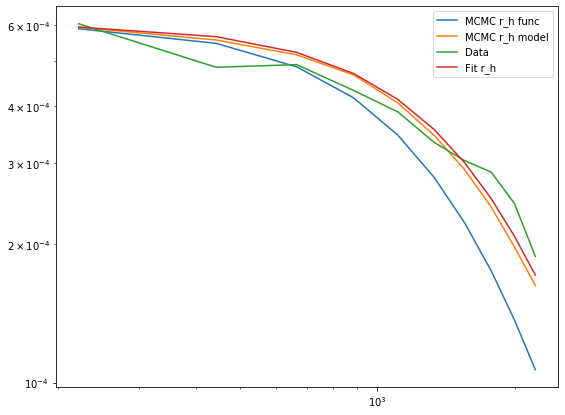

In [27]:
fig,ax= plt.subplots(figsize=(9,7))

y = func(dist_h,r_h_h)
ax.set_yscale('log')
ax.set_xscale('log')

plt.plot(dist_h,y,label='MCMC r_h func')  # inputting MCMC r_h
# into function that I am fitting to find r_h
plt.plot(dist_h,model_1d_h,label='MCMC r_h model')  # what the MCMC
# model looks like with r_h value
plt.plot(dist_h,data_1d_h,label='Data')  # just the data
plt.plot(dist_h,func(dist_h,popt),label='Fit r_h')  # what the fit
# r_h ends up being


ax.legend()

plt.savefig('figures/rh_fitting.png')
plt.show()

In [28]:
popt/r_h_h

array([1.23572221])

In [29]:
#pixel/20 = arcsec
#arcsec/60 = arcmin

print(popt/1200,'arcmin')
print(r_h_h/1200,'arcmin')

[2.28294579] arcmin
1.8474587339402948 arcmin


In [30]:
# find value of central luminosity density
# find # of stars in small area in center, divide by that area